In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
df = pd.read_excel('telcom_data.xlsx')

In [66]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [67]:
# Handle missing values
df.fillna(df.mean(), inplace=True)

In [68]:
df['session_frequency'] = df.groupby(by=['MSISDN/Number'])['Dur. (ms)'].transform('count')

In [69]:
df['Session_Duration'] = df['Dur. (ms)']


In [70]:
df['total_traffic'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']


In [71]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),session_frequency,Session_Duration,total_traffic
0,13114483460844900352,2019-04-04 12:01:18,770.0000,2019-04-25 14:35:31,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08,2,1.823652e+06,3.456294e+08
1,13114483482878900224,2019-04-09 13:04:04,235.0000,2019-04-25 08:15:48,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08,2,1.365104e+06,7.071854e+08
2,13114483484080500736,2019-04-09 17:42:11,1.0000,2019-04-25 11:58:13,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08,1,1.361762e+06,3.076910e+08
3,13114483485442799616,2019-04-10 00:31:25,486.0000,2019-04-25 07:36:35,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08,1,1.321509e+06,8.893527e+08
4,13114483499480700928,2019-04-12 20:10:23,565.0000,2019-04-25 10:40:32,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08,1,1.089009e+06,6.076814e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0000,2019-04-30 06:02:33,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08,1,8.123000e+04,6.318041e+08
149997,7349883264234609664,2019-04-29 07:28:42,483.0000,2019-04-30 10:41:33,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08,2,9.797000e+04,7.057839e+08
149998,13114483573367300096,2019-04-29 07:28:43,283.0000,2019-04-30 10:46:12,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08,1,9.824900e+04,6.276986e+08
149999,13114483573367300096,2019-04-29 07:28:43,696.0000,2019-04-30 10:40:34,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08,1,9.791000e+04,4.015220e+08


In [72]:
df['session_frequency']

0            2
1            2
2            1
3            1
4            1
          ... 
149996       1
149997       2
149998       1
149999       1
150000    1066
Name: session_frequency, Length: 150001, dtype: int64

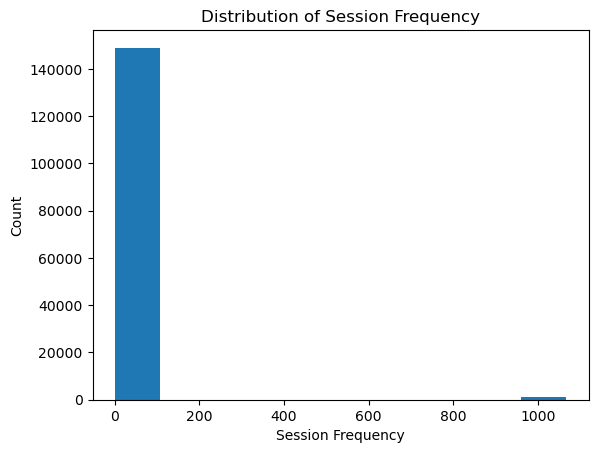

In [73]:
df['session_frequency'].plot(kind='hist', bins=10)

plt.xlabel('Session Frequency')
plt.ylabel('Count')
plt.title('Distribution of Session Frequency')
plt.show()

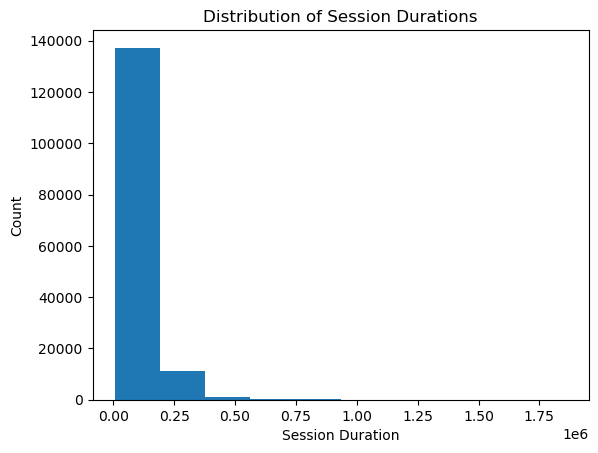

In [74]:
df['Session_Duration'].plot(kind='hist', bins=10)

plt.xlabel('Session Duration')
plt.ylabel('Count')
plt.title('Distribution of Session Durations')
plt.show()

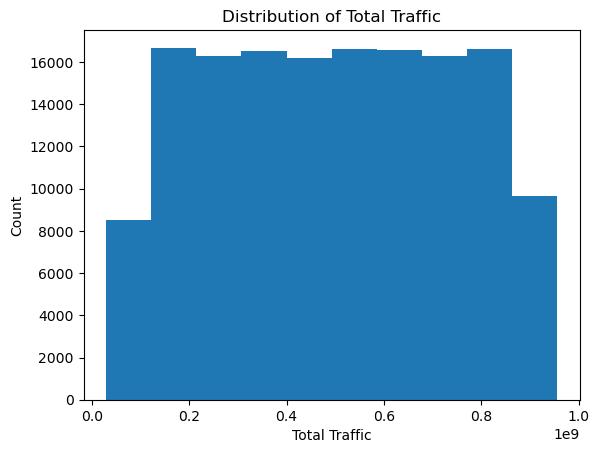

In [75]:
df['total_traffic'].plot(kind='hist', bins=10)

plt.xlabel('Total Traffic')
plt.ylabel('Count')
plt.title('Distribution of Total Traffic')
plt.show()

In [76]:

# Aggregate engagement metrics per customer id (MSISDN)
engagement_metrics = df.groupby('MSISDN/Number').agg({
    'session_frequency': 'sum',
    'Session_Duration': 'sum',
    'total_traffic': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()


In [77]:

# Report the top 10 customers per engagement metric
top_10_sessions_frequency = engagement_metrics.nlargest(10, 'session_frequency')
top_10_session_duration = engagement_metrics.nlargest(10, 'Session_Duration')
top_10_total_traffic = engagement_metrics.nlargest(10, 'total_traffic')
top_10_social_media = engagement_metrics.nlargest(10, 'Social Media DL (Bytes)')
top_10_google = engagement_metrics.nlargest(10, 'Google DL (Bytes)')
top_10_email = engagement_metrics.nlargest(10, 'Email DL (Bytes)')
top_10_youtube = engagement_metrics.nlargest(10, 'Youtube DL (Bytes)')
top_10_netflix = engagement_metrics.nlargest(10, 'Netflix DL (Bytes)')
top_10_gaming = engagement_metrics.nlargest(10, 'Gaming DL (Bytes)')
top_10_other = engagement_metrics.nlargest(10, 'Other DL (Bytes)')



In [78]:
top_10_sessions_frequency

,MSISDN/Number,session_frequency,Session_Duration,total_traffic,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
106853,4.188282e+10,1136356,7.255100e+07,5.317447e+11,1.937715e+09,3.610230e+07,6.007942e+09,2.240634e+09,1.904048e+09,4.958324e+08,1.249464e+10,1.184609e+10,1.228898e+10,1.196459e+10,4.527450e+11,8.733066e+09,4.419283e+11,9.050107e+09
13526,3.362632e+10,324,8.791927e+06,7.971167e+09,4.274384e+07,6.309420e+05,1.161065e+08,3.608540e+07,3.340478e+07,9.013997e+06,1.640487e+08,2.104343e+08,1.994792e+08,1.292465e+08,6.745734e+09,1.418386e+08,8.025477e+09,1.424009e+08
6437,3.361489e+10,289,9.966898e+06,8.846226e+09,2.774974e+07,5.448000e+05,9.394171e+07,3.403208e+07,3.360721e+07,7.181423e+06,1.998234e+08,1.945468e+08,1.795860e+08,1.818151e+08,7.622035e+09,1.273968e+08,7.495298e+09,1.439660e+08
13180,3.362578e+10,289,1.855375e+07,8.499621e+09,2.656412e+07,5.713790e+05,1.079047e+08,3.440318e+07,3.189541e+07,8.738554e+06,2.378830e+08,2.150757e+08,1.939122e+08,1.630684e+08,7.171884e+09,1.547897e+08,6.201653e+09,1.529305e+08
37052,3.365973e+10,256,4.035428e+06,7.705863e+09,3.490044e+07,5.119140e+05,9.095855e+07,2.555780e+07,2.990765e+07,6.092145e+06,1.196581e+08,1.383329e+08,1.962772e+08,2.032419e+08,6.609900e+09,1.156587e+08,6.182551e+09,1.348649e+08
76363,3.367588e+10,225,4.865947e+06,7.891111e+09,1.865536e+07,5.675570e+05,8.300299e+07,2.685751e+07,2.428472e+07,7.229698e+06,1.586652e+08,1.587453e+08,1.616265e+08,1.474667e+08,6.863307e+09,1.072606e+08,6.665074e+09,1.334414e+08
92923,3.376054e+10,225,9.279434e+06,8.514774e+09,3.929765e+07,4.855430e+05,8.862653e+07,3.459657e+07,2.643790e+07,7.255872e+06,1.940683e+08,2.022209e+08,1.465008e+08,1.881424e+08,7.316364e+09,1.446811e+08,4.590038e+09,1.260962e+08
65118,3.366716e+10,169,8.744914e+06,5.618394e+09,2.375375e+07,4.940970e+05,7.170783e+07,3.332487e+07,2.327675e+07,7.059044e+06,1.419727e+08,1.732586e+08,1.679324e+08,1.460071e+08,4.623424e+09,1.021977e+08,4.837534e+09,1.039850e+08
666,3.360313e+10,144,6.287761e+06,4.976195e+09,2.277668e+07,3.011460e+05,7.394206e+07,1.298696e+07,2.034373e+07,5.855167e+06,1.589767e+08,1.251134e+08,1.560865e+08,1.044019e+08,4.108482e+09,8.296289e+07,6.222705e+09,1.039662e+08
1279,3.360452e+10,144,5.207990e+06,5.487855e+09,1.808372e+07,3.927980e+05,5.770615e+07,2.610889e+07,1.939708e+07,4.457346e+06,8.316936e+07,9.651739e+07,1.513304e+08,1.140439e+08,4.766393e+09,8.027069e+07,4.059958e+09,6.998487e+07


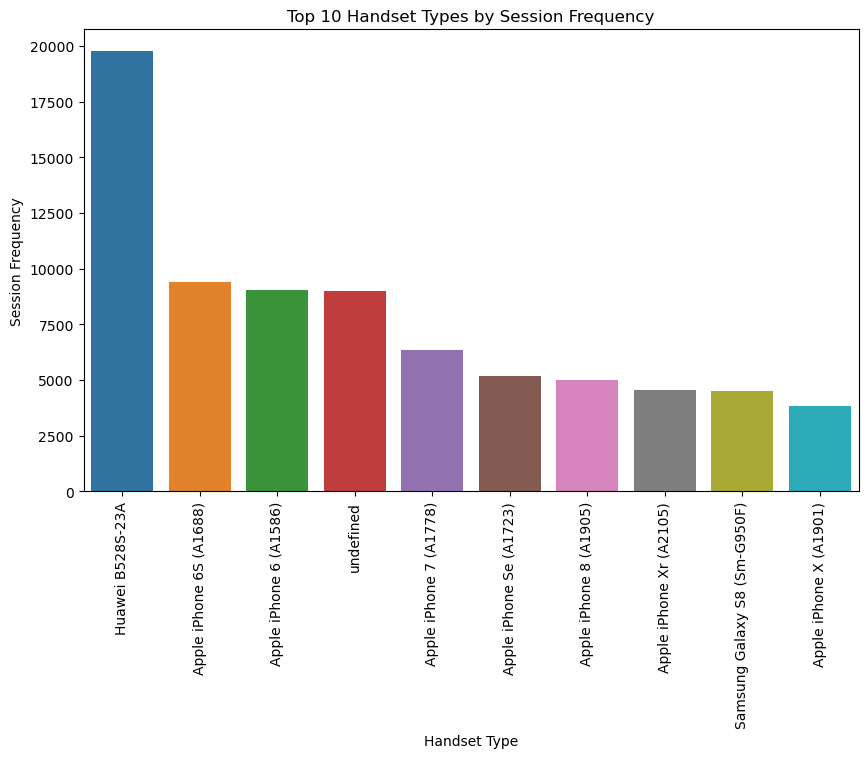

In [79]:
# Group the data by 'Handset Type' and 'MSISDN/Number' and count the number of unique sessions
session_frequency = df.groupby(['Handset Type', 'MSISDN/Number'])['Dur. (ms)'].count().reset_index()

# Group the data by 'Handset Type' and calculate the total session frequency
type_frequency = session_frequency.groupby('Handset Type')['Dur. (ms)'].sum().reset_index()

# Sort the data by session frequency in descending order
type_frequency = type_frequency.sort_values('Dur. (ms)', ascending=False).head(10)

# Plot the session frequency by handset type
plt.figure(figsize=(10, 6))
sns.barplot(data=type_frequency, x='Handset Type', y='Dur. (ms)')
plt.xlabel('Handset Type')
plt.ylabel('Session Frequency')
plt.title('Top 10 Handset Types by Session Frequency')
plt.xticks(rotation=90)
plt.show()

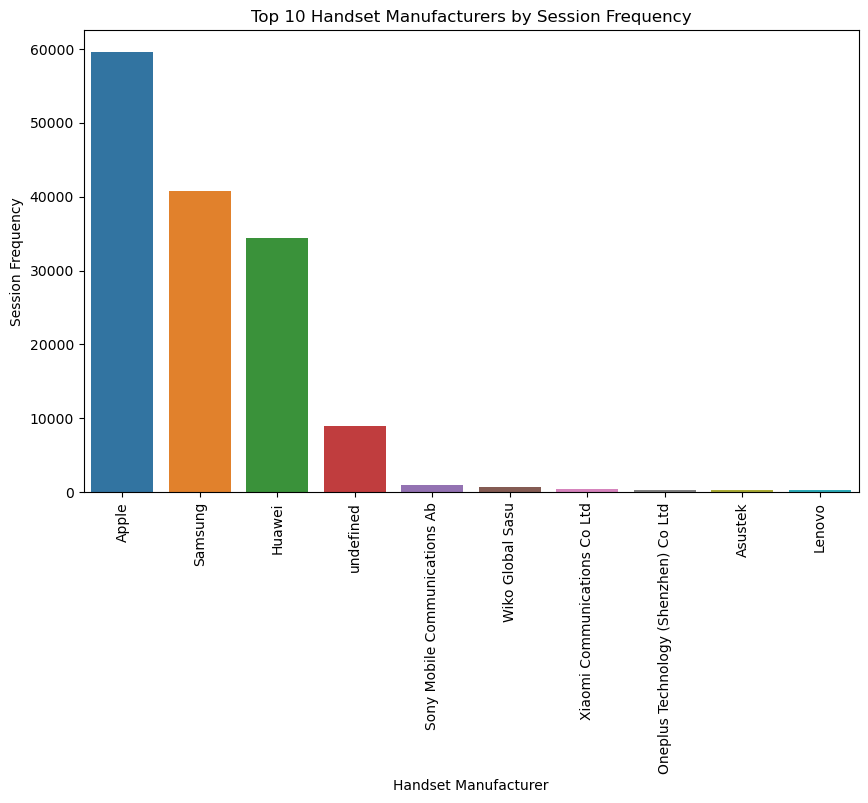

In [80]:
# Group the data by 'Handset Manufacturer' and 'MSISDN/Number' and count the number of unique sessions
session_frequency1 = df.groupby(['Handset Manufacturer', 'MSISDN/Number'])['Dur. (ms)'].count().reset_index()

# Group the data by 'Handset Manufacturer' and calculate the total session frequency
manufacturer_frequency = session_frequency1.groupby('Handset Manufacturer')['Dur. (ms)'].sum().reset_index()

# Sort the data by session frequency in descending order
manufacturer_frequency = manufacturer_frequency.sort_values('Dur. (ms)', ascending=False).head(10)

# Plot the session frequency by handset manufacturer
plt.figure(figsize=(10, 6))
sns.barplot(data=manufacturer_frequency, x='Handset Manufacturer', y='Dur. (ms)')
plt.xlabel('Handset Manufacturer')
plt.ylabel('Session Frequency')
plt.title('Top 10 Handset Manufacturers by Session Frequency')
plt.xticks(rotation=90)
plt.show()

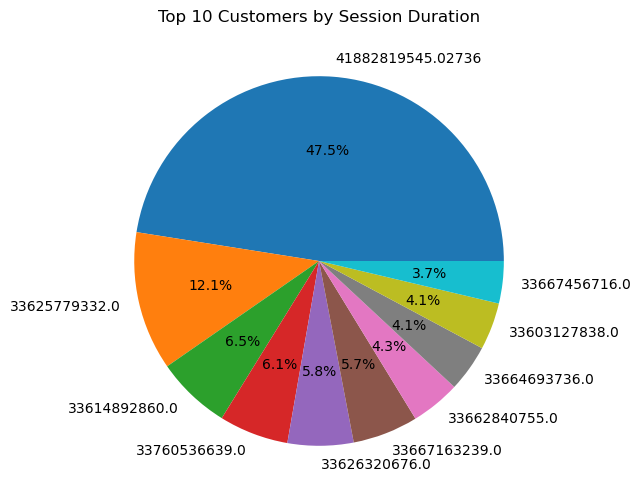

In [81]:
# Top 10 session duration
plt.figure(figsize=(6, 6))
plt.pie(top_10_session_duration['Session_Duration'], labels=top_10_session_duration['MSISDN/Number'], autopct='%1.1f%%')
plt.title('Top 10 Customers by Session Duration')
plt.show()


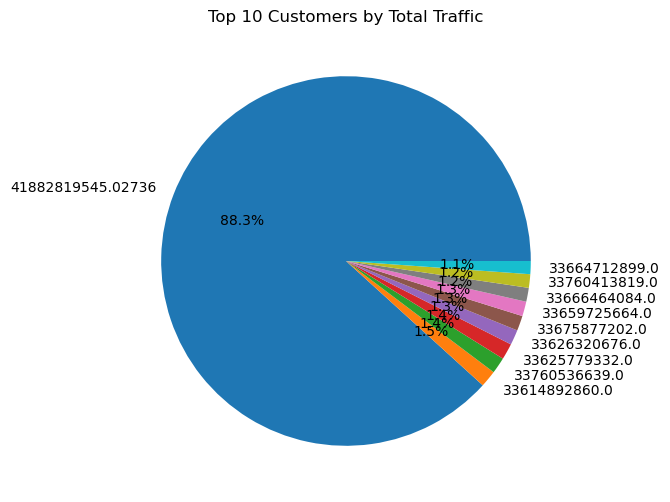

In [82]:
# Top 10 total traffic
plt.figure(figsize=(6, 6))
plt.pie(top_10_total_traffic['total_traffic'], labels=top_10_total_traffic['MSISDN/Number'], autopct='%1.1f%%')
plt.title('Top 10 Customers by Total Traffic')
plt.show()


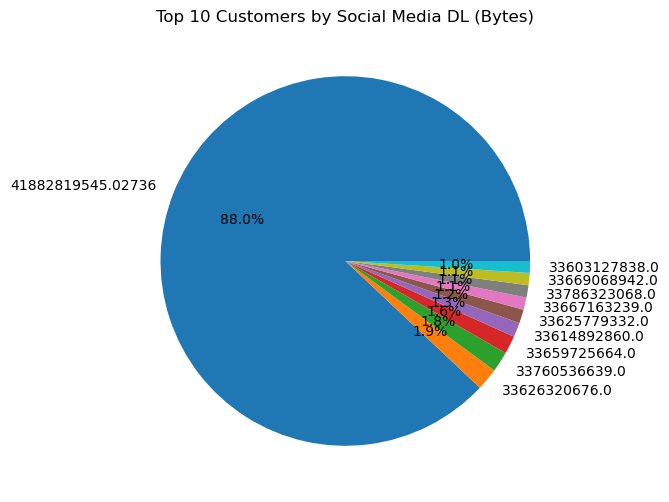

In [83]:
# Top 10 Social Media DL (Bytes)
plt.figure(figsize=(6, 6))
plt.pie(top_10_social_media['Social Media DL (Bytes)'], labels=top_10_social_media['MSISDN/Number'], autopct='%1.1f%%')
plt.title('Top 10 Customers by Social Media DL (Bytes)')
plt.show()



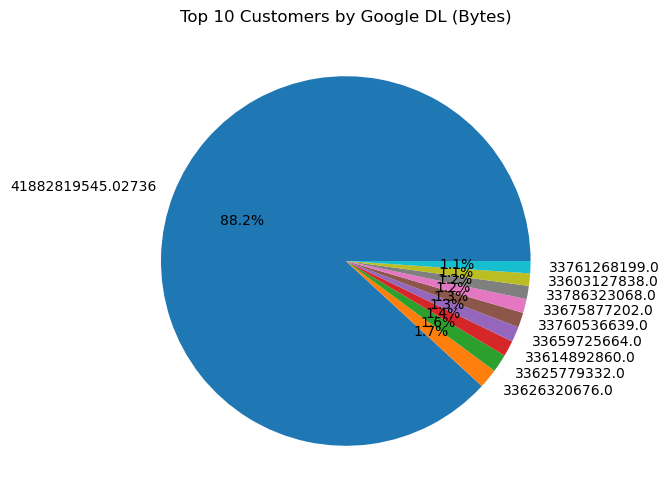

In [84]:

# Top 10 Google DL (Bytes)
plt.figure(figsize=(6, 6))
plt.pie(top_10_google['Google DL (Bytes)'], labels=top_10_google['MSISDN/Number'], autopct='%1.1f%%')
plt.title('Top 10 Customers by Google DL (Bytes)')
plt.show()

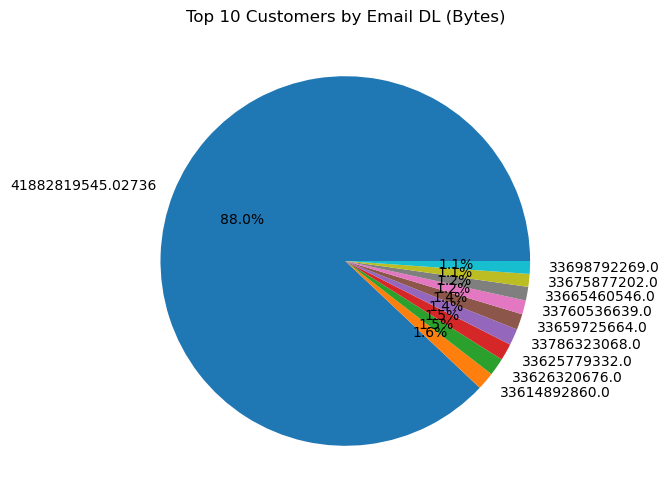

In [85]:

# Top 10 Email DL (Bytes)
plt.figure(figsize=(6, 6))
plt.pie(top_10_email['Email DL (Bytes)'], labels=top_10_email['MSISDN/Number'], autopct='%1.1f%%')
plt.title('Top 10 Customers by Email DL (Bytes)')
plt.show()



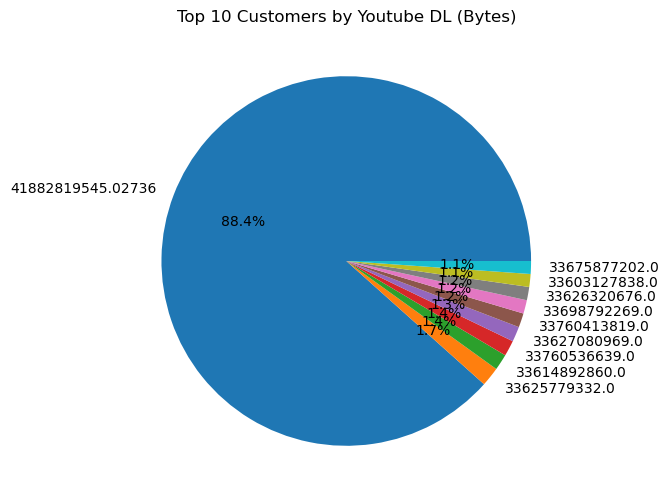

In [86]:
# Top 10 Youtube DL (Bytes)
plt.figure(figsize=(6, 6))
plt.pie(top_10_youtube['Youtube DL (Bytes)'], labels=top_10_youtube['MSISDN/Number'], autopct='%1.1f%%')
plt.title('Top 10 Customers by Youtube DL (Bytes)')
plt.show()


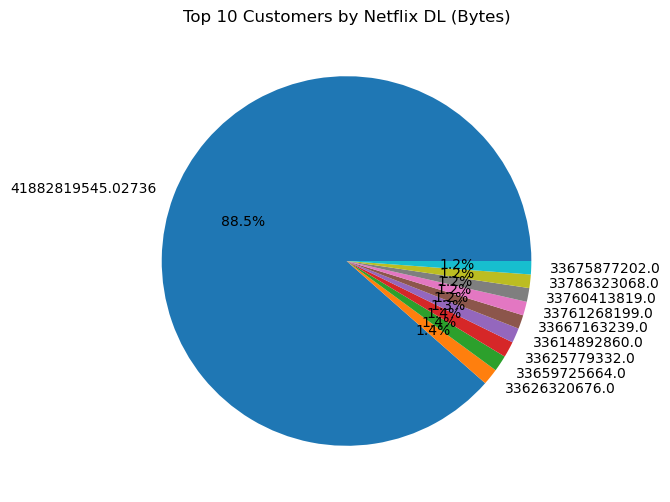

In [87]:

# Top 10 Netflix DL (Bytes)
plt.figure(figsize=(6, 6))
plt.pie(top_10_netflix['Netflix DL (Bytes)'], labels=top_10_netflix['MSISDN/Number'], autopct='%1.1f%%')
plt.title('Top 10 Customers by Netflix DL (Bytes)')
plt.show()


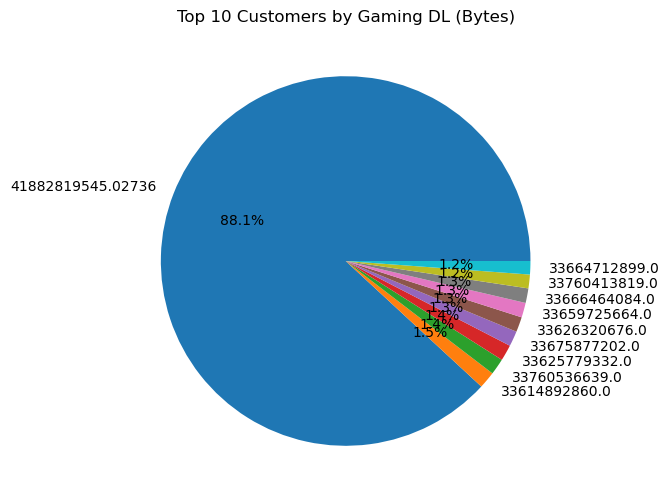

In [88]:

# Top 10 Gaming DL (Bytes)
plt.figure(figsize=(6, 6))
plt.pie(top_10_gaming['Gaming DL (Bytes)'], labels=top_10_gaming['MSISDN/Number'], autopct='%1.1f%%')
plt.title('Top 10 Customers by Gaming DL (Bytes)')
plt.show()



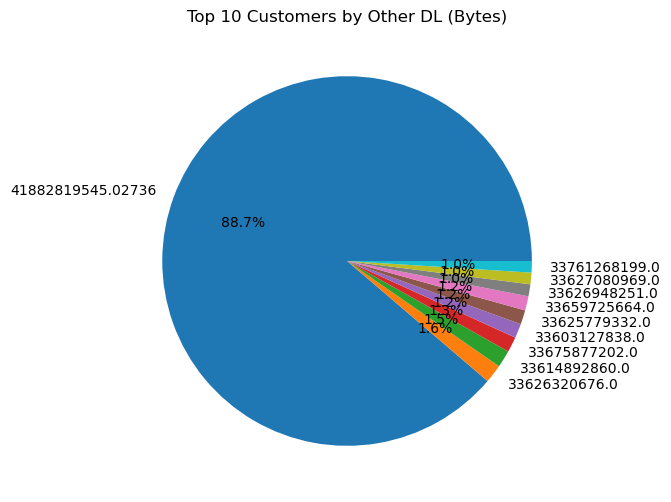

In [89]:
# Top 10 Other DL (Bytes)
plt.figure(figsize=(6, 6))
plt.pie(top_10_other['Other DL (Bytes)'], labels=top_10_other['MSISDN/Number'], autopct='%1.1f%%')
plt.title('Top 10 Customers by Other DL (Bytes)')
plt.show()

### Task 2.1

In [90]:
# Normalize engagement metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
engagement_metrics_normalized = scaler.fit_transform(engagement_metrics[['session_frequency', 'Session_Duration', 'total_traffic',
                                                                         'Social Media DL (Bytes)',
                                                                         'Social Media UL (Bytes)',
                                                                         'Google DL (Bytes)',
                                                                         'Google UL (Bytes)',
                                                                         'Email DL (Bytes)',
                                                                         'Email UL (Bytes)',
                                                                         'Youtube DL (Bytes)',
                                                                         'Youtube UL (Bytes)',
                                                                         'Netflix DL (Bytes)',
                                                                         'Netflix UL (Bytes)',
                                                                         'Gaming DL (Bytes)',
                                                                         'Gaming UL (Bytes)',
                                                                         'Other DL (Bytes)',
                                                                         'Other UL (Bytes)']])



In [91]:
# Run k-means clustering (k=3) on normalized engagement metrics
kmeans = KMeans(n_clusters=3, random_state=0)
engagement_clusters = kmeans.fit_predict(engagement_metrics_normalized)


In [92]:
# Add engagement clusters to the DataFrame
engagement_metrics['engagement_cluster'] = engagement_clusters

In [93]:
cluster_metrics = engagement_metrics.groupby('engagement_cluster').agg({
    'session_frequency': ['min', 'max', 'mean', 'sum'],
    'Session_Duration': ['min', 'max', 'mean', 'sum'],
    'total_traffic': ['min', 'max', 'mean', 'sum']
})


In [94]:
cluster_metrics

session_frequency                                  \
                                 min      max          mean      sum   
engagement_cluster                                                     
0                                  1        9  1.636163e+00   160897   
1                            1136356  1136356  1.136356e+06  1136356   
2                                  1      324  1.363090e+01   116108   

                   Session_Duration                                            \
                                min           max          mean           sum   
engagement_cluster                                                              
0                      7.142000e+03  1.030531e+06  1.179955e+05  1.160344e+10   
1                      7.255100e+07  7.255100e+07  7.255100e+07  7.255100e+07   
2                      3.385300e+04  1.855375e+07  4.714009e+05  4.015393e+09   

                   total_traffic                                            
                             min           max          mean           sum  
engagement_cluster                                                          
0                   3.324901e+07  2.183190e+09  5.988676e+08  5.889145e+13  
1                   5.317447e+11  5.317447e+11  5.317447e+11  5.317447e+11  
2                   1.184873e+08  8.846226e+09  1.754168e+09  1.494200e+13

In [95]:
# Assign cluster labels to data
customer_clusters = kmeans.labels_

# Add cluster labels to the aggregate dataframe
engagement_metrics['Cluster'] = customer_clusters

# Print the number of customers in each cluster
print(engagement_metrics['Cluster'].value_counts())

0    98338
2     8518
1        1
Name: Cluster, dtype: int64



Top 10 customers in Cluster 0:
        session_frequency  Session_Duration  total_traffic
69432                   1         1030531.0    192989248.0
50230                   1          990400.0    330122677.0
49704                   1          951453.0    494313738.0
100403                  1          904024.0    613904375.0
56396                   1          889834.0    568809782.0
106854                  1          877385.0    232123971.0
100323                  1          869830.0     97053379.0
33023                   1          868418.0    486937142.0
77504                   1          863117.0    599771365.0
32499                   1          851080.0    633036027.0

Top 10 customers in Cluster 1:
        session_frequency  Session_Duration  total_traffic
106853            1136356      7.255100e+07   5.317447e+11

Top 10 customers in Cluster 2:
       session_frequency  Session_Duration  total_traffic
13180                289        18553754.0   8.499621e+09
6437                 

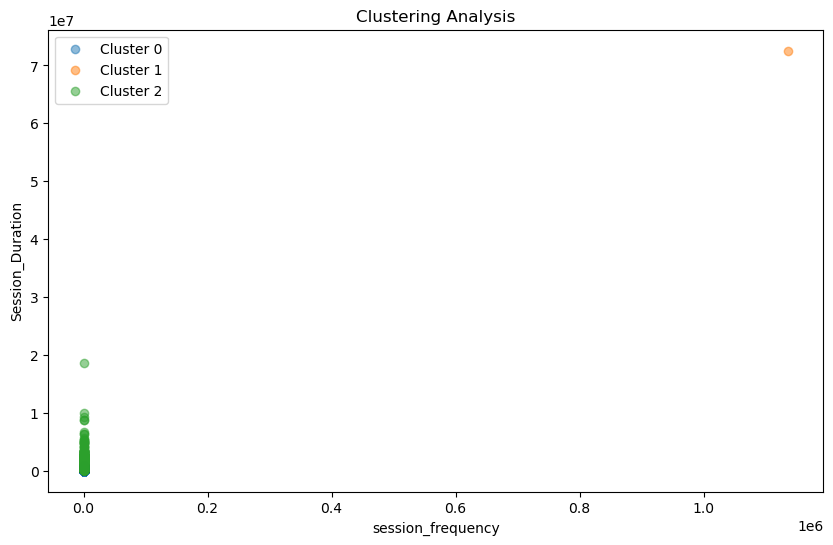

In [96]:
for cluster in range(3):
    print(f"\nTop 10 customers in Cluster {cluster}:")
    top_10_customers = engagement_metrics[engagement_metrics['Cluster'] == cluster].nlargest(10, 'Session_Duration')
    print(top_10_customers[['session_frequency', 'Session_Duration', 'total_traffic']])

x_metric = 'session_frequency'
y_metric = 'Session_Duration'

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = engagement_metrics[engagement_metrics['Cluster'] == cluster]
    plt.scatter(cluster_data[x_metric], cluster_data[y_metric], label=f'Cluster {cluster}',alpha=0.5)
plt.xlabel(x_metric)
plt.ylabel(y_metric)
plt.title('Clustering Analysis')
plt.legend()
plt.show()

In [97]:
cluster_metrics

session_frequency                                  \
                                 min      max          mean      sum   
engagement_cluster                                                     
0                                  1        9  1.636163e+00   160897   
1                            1136356  1136356  1.136356e+06  1136356   
2                                  1      324  1.363090e+01   116108   

                   Session_Duration                                            \
                                min           max          mean           sum   
engagement_cluster                                                              
0                      7.142000e+03  1.030531e+06  1.179955e+05  1.160344e+10   
1                      7.255100e+07  7.255100e+07  7.255100e+07  7.255100e+07   
2                      3.385300e+04  1.855375e+07  4.714009e+05  4.015393e+09   

                   total_traffic                                            
                             min           max          mean           sum  
engagement_cluster                                                          
0                   3.324901e+07  2.183190e+09  5.988676e+08  5.889145e+13  
1                   5.317447e+11  5.317447e+11  5.317447e+11  5.317447e+11  
2                   1.184873e+08  8.846226e+09  1.754168e+09  1.494200e+13

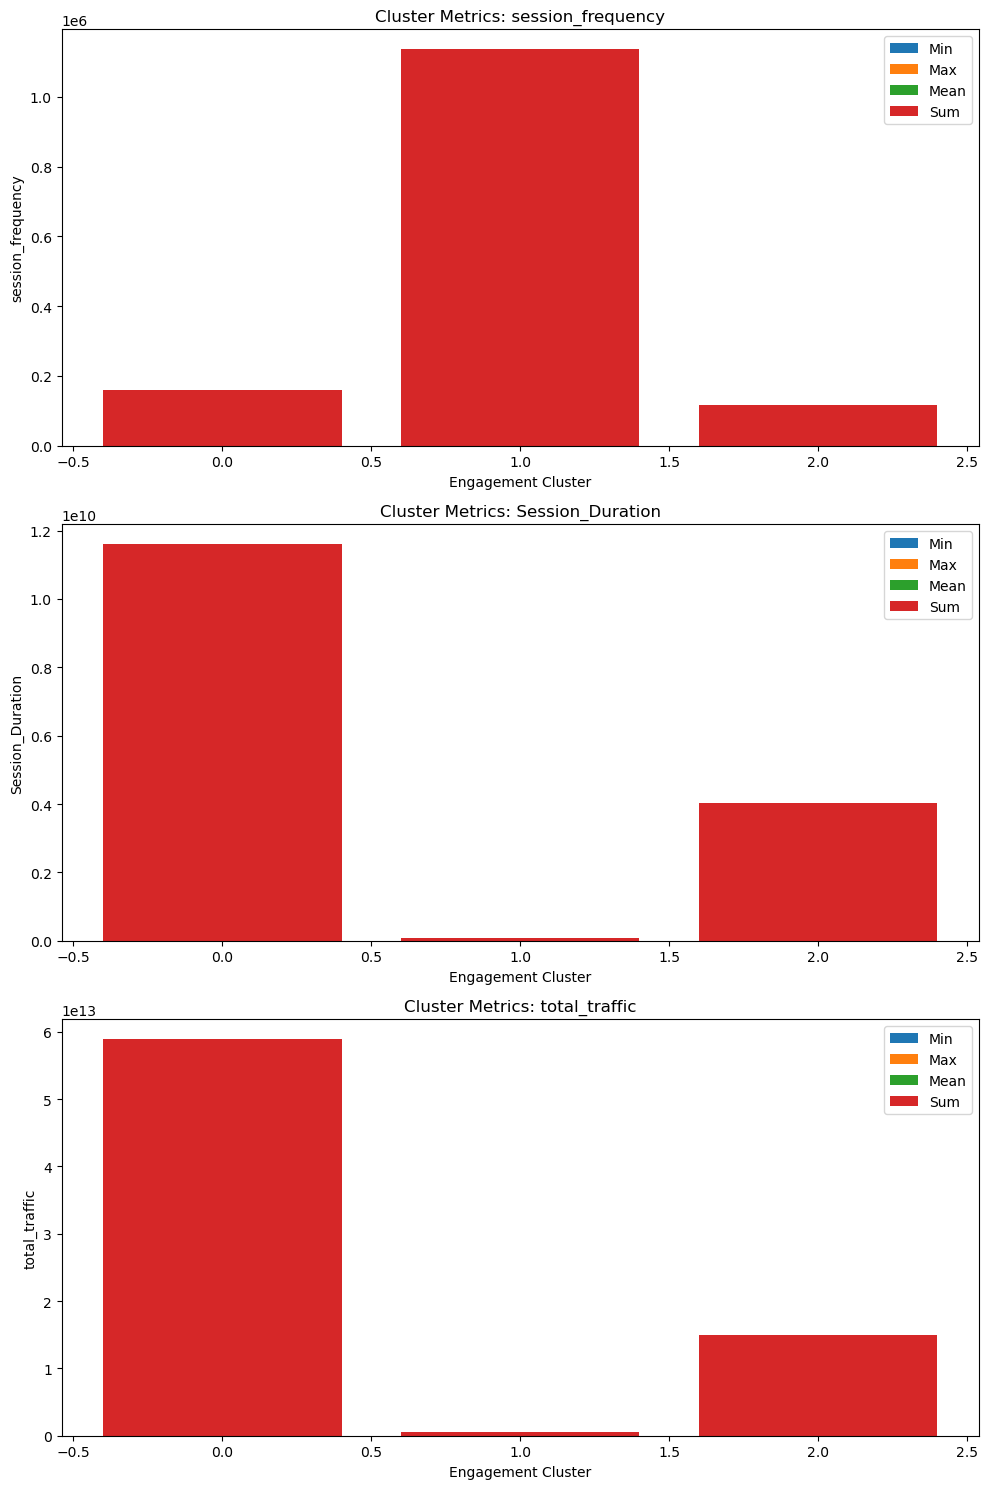

In [102]:

# Plot the non-normalized metrics for each cluster
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, metric in enumerate(['session_frequency', 'Session_Duration', 'total_traffic']):
    ax = axes[i]
    cluster_data = cluster_metrics[metric]
    cluster_labels = cluster_data.index

    ax.bar(cluster_labels, cluster_data['min'], label='Min')
    ax.bar(cluster_labels, cluster_data['max'], label='Max')
    ax.bar(cluster_labels, cluster_data['mean'], label='Mean')
    ax.bar(cluster_labels, cluster_data['sum'], label='Sum')

    ax.set_xlabel('Engagement Cluster')
    ax.set_ylabel(metric)
    ax.set_title(f'Cluster Metrics: {metric}')
    ax.legend()

plt.tight_layout()
plt.show()


In [101]:
print (cluster_labels)

Int64Index([0, 1, 2], dtype='int64', name='engagement_cluster')


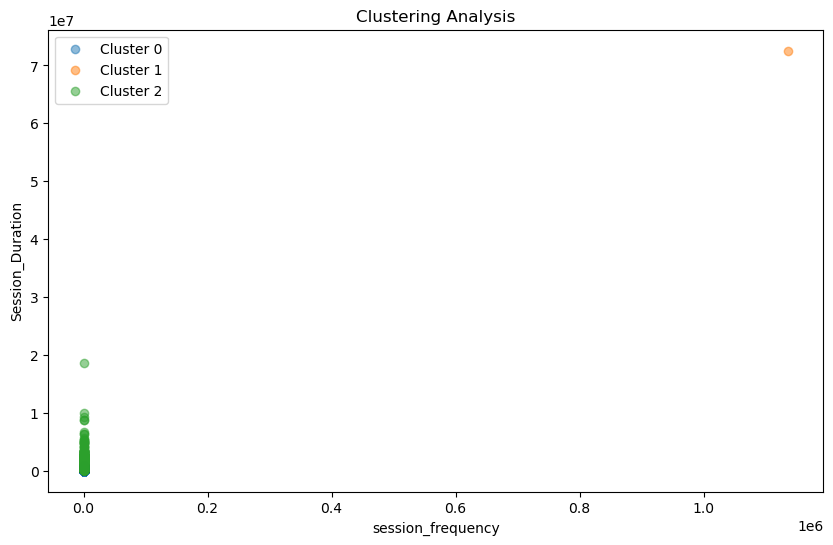

In [103]:
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = engagement_metrics[engagement_metrics['Cluster'] == cluster]
    plt.scatter(cluster_data[x_metric], cluster_data[y_metric], label=f'Cluster {cluster}',alpha=0.5)
plt.xlabel(x_metric)
plt.ylabel(y_metric)
plt.title('Clustering Analysis')
plt.legend()
plt.show()

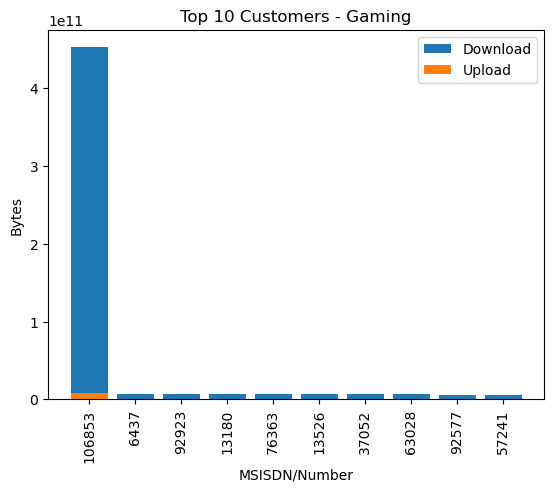

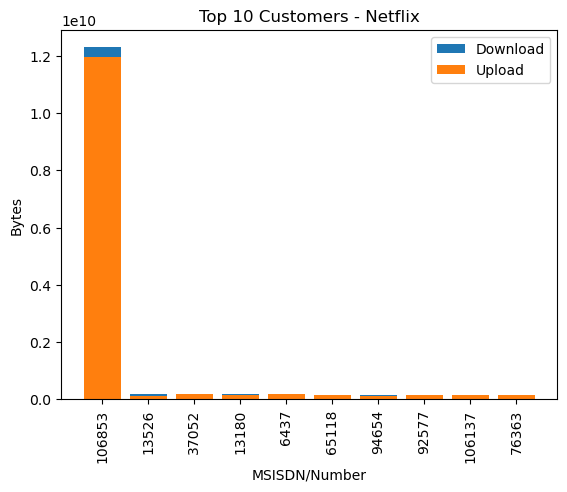

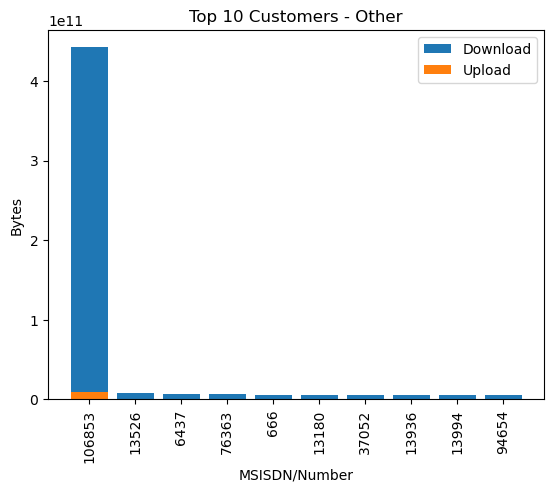

In [43]:

# Plot the top 3 most used applications
top_3_applications = ['Gaming', 'Netflix', 'Other']

for app in top_3_applications:
    plt.figure()  # Create a new figure for each application
    top_10_customers = engagement_metrics.sort_values(by=f"{app} DL (Bytes)", ascending=False).head(10)
    x = range(len(top_10_customers))
    plt.bar(x, top_10_customers[f"{app} DL (Bytes)"], label='Download')
    plt.bar(x, top_10_customers[f"{app} UL (Bytes)"], label='Upload')
    plt.xlabel('MSISDN/Number')
    plt.ylabel('Bytes')
    plt.title(f'Top 10 Customers - {app}')
    plt.xticks(x, top_10_customers.index, rotation='vertical')
    plt.legend()
    plt.show()

In [44]:
top_10_customers

,MSISDN/Number,session_frequency,Session_Duration,total_traffic,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Cluster,engagement_cluster
106853,4.188282e+10,1136356,7.255100e+07,5.317447e+11,1.937715e+09,3.610230e+07,6.007942e+09,2.240634e+09,1.904048e+09,4.958324e+08,1.249464e+10,1.184609e+10,1.228898e+10,1.196459e+10,4.527450e+11,8.733066e+09,4.419283e+11,9.050107e+09,1,1
13526,3.362632e+10,324,8.791927e+06,7.971167e+09,4.274384e+07,6.309420e+05,1.161065e+08,3.608540e+07,3.340478e+07,9.013997e+06,1.640487e+08,2.104343e+08,1.994792e+08,1.292465e+08,6.745734e+09,1.418386e+08,8.025477e+09,1.424009e+08,2,2
6437,3.361489e+10,289,9.966898e+06,8.846226e+09,2.774974e+07,5.448000e+05,9.394171e+07,3.403208e+07,3.360721e+07,7.181423e+06,1.998234e+08,1.945468e+08,1.795860e+08,1.818151e+08,7.622035e+09,1.273968e+08,7.495298e+09,1.439660e+08,2,2
76363,3.367588e+10,225,4.865947e+06,7.891111e+09,1.865536e+07,5.675570e+05,8.300299e+07,2.685751e+07,2.428472e+07,7.229698e+06,1.586652e+08,1.587453e+08,1.616265e+08,1.474667e+08,6.863307e+09,1.072606e+08,6.665074e+09,1.334414e+08,2,2
666,3.360313e+10,144,6.287761e+06,4.976195e+09,2.277668e+07,3.011460e+05,7.394206e+07,1.298696e+07,2.034373e+07,5.855167e+06,1.589767e+08,1.251134e+08,1.560865e+08,1.044019e+08,4.108482e+09,8.296289e+07,6.222705e+09,1.039662e+08,2,2
13180,3.362578e+10,289,1.855375e+07,8.499621e+09,2.656412e+07,5.713790e+05,1.079047e+08,3.440318e+07,3.189541e+07,8.738554e+06,2.378830e+08,2.150757e+08,1.939122e+08,1.630684e+08,7.171884e+09,1.547897e+08,6.201653e+09,1.529305e+08,2,2
37052,3.365973e+10,256,4.035428e+06,7.705863e+09,3.490044e+07,5.119140e+05,9.095855e+07,2.555780e+07,2.990765e+07,6.092145e+06,1.196581e+08,1.383329e+08,1.962772e+08,2.032419e+08,6.609900e+09,1.156587e+08,6.182551e+09,1.348649e+08,2,2
13936,3.362695e+10,100,2.415036e+06,4.825638e+09,1.658993e+07,3.320680e+05,5.762776e+07,1.236019e+07,1.297899e+07,4.503799e+06,8.547465e+07,1.146106e+08,1.179109e+08,1.448111e+08,4.099560e+09,8.220240e+07,5.228772e+09,7.667580e+07,2,2
13994,3.362708e+10,144,4.703516e+06,5.754731e+09,1.743867e+07,3.702400e+05,6.272240e+07,2.440352e+07,1.735396e+07,6.213264e+06,1.873233e+08,1.214675e+08,1.446232e+08,1.224177e+08,4.880017e+09,9.233558e+07,5.039747e+09,7.804420e+07,2,2
94654,3.376127e+10,100,3.481629e+06,5.051114e+09,1.420143e+07,2.946530e+05,7.294980e+07,2.414018e+07,1.576884e+07,4.984880e+06,1.190565e+08,1.537331e+08,1.672611e+08,1.248302e+08,4.165410e+09,1.086893e+08,4.997985e+09,7.979475e+07,2,2


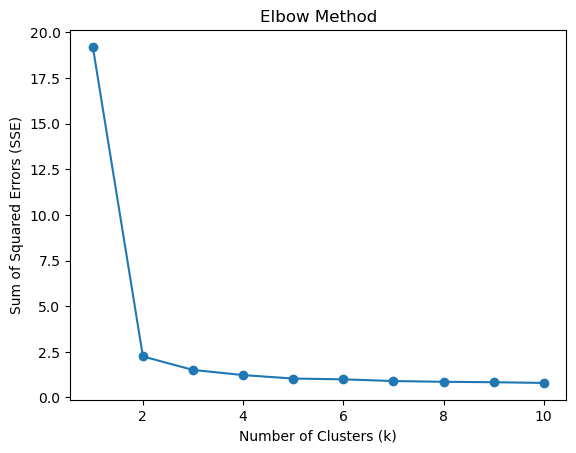

In [45]:
import warnings
warnings.filterwarnings("ignore")

sse = {}
kmax = 10

for k in range(1, kmax + 1):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(engagement_metrics_normalized)
    sse[k] = kmeans.inertia_

plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()


# K = 2

In [46]:
from sklearn.preprocessing import MinMaxScaler

# Normalize each engagement metric
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(engagement_metrics)


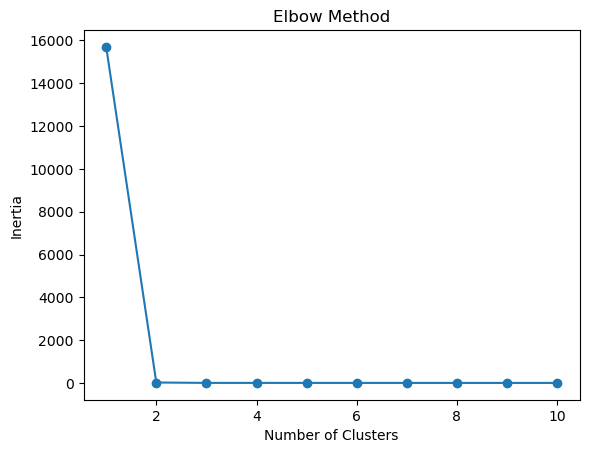

In [56]:

# Define a range of cluster numbers to test
cluster_range = range(1, 11)

# Initialize an empty list to store the inertia values (sum of squared distances from samples to their closest cluster center)
inertia_values = []

# Iterate over the cluster range and compute the inertia for each number of clusters
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(normalized_data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [57]:

for app in applications:
    engaged_users_per_app[app] = engagement_metrics[f'{app} DL (Bytes)'] + engagement_metrics[f'{app} UL (Bytes)']
    top_10_users_per_app[app] = engaged_users_per_app[app].nlargest(10)

# Print the results
print("Engaged Users per Application:")
print(engaged_users_per_app)
print(50*"*")
print("\nTop 10 Most Engaged Users per Application:")
print(top_10_users_per_app)

Engaged Users per Application:
{'Social Media': 0         2.232135e+06
1         2.660565e+06
2         3.195623e+06
3         2.802940e+05
4         2.912542e+06
              ...     
106852    4.985690e+05
106853    1.973817e+09
106854    7.152240e+05
106855    5.215660e+05
106856    1.546088e+06
Length: 106857, dtype: float64, 'Google': 0         4.389005e+06
1         5.334863e+06
2         3.443126e+06
3         9.678493e+06
4         1.849962e+07
              ...     
106852    5.429705e+06
106853    8.248577e+09
106854    1.043866e+07
106855    9.830617e+06
106856    9.218647e+06
Length: 106857, dtype: float64, 'Email': 0         1.331362e+06
1         3.307781e+06
2         3.205380e+06
3         2.284670e+06
4         3.305469e+06
              ...     
106852    2.514097e+06
106853    2.399880e+09
106854    1.520771e+06
106855    3.318582e+06
106856    3.330974e+06
Length: 106857, dtype: float64, 'Youtube': 0         2.162455e+07
1         1.243222e+07
2         2.133357e+0

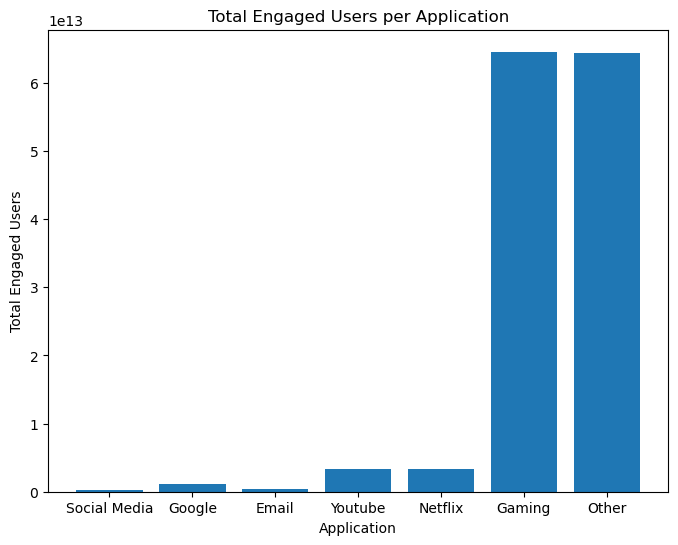

In [58]:
# Calculate the total engaged users per application
total_engaged_users = [engaged_users_per_app[app].sum() for app in applications]

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(applications, total_engaged_users)
plt.xlabel('Application')
plt.ylabel('Total Engaged Users')
plt.title('Total Engaged Users per Application')

# Display the graph
plt.show()

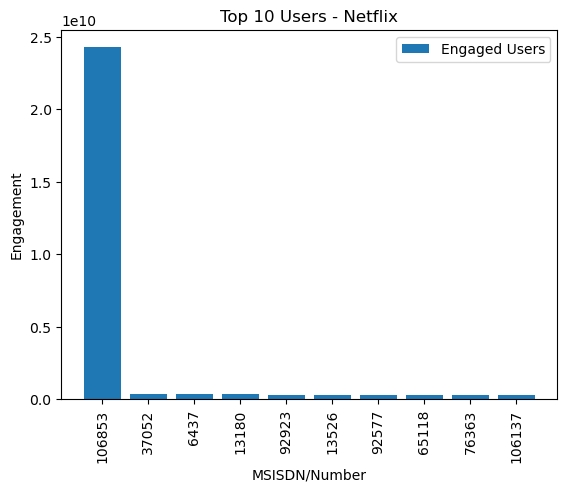

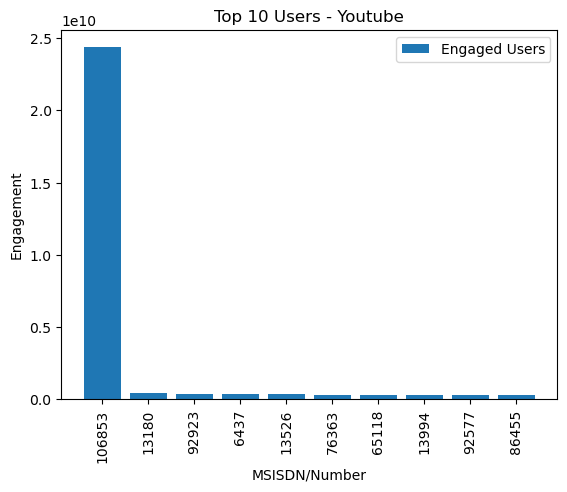

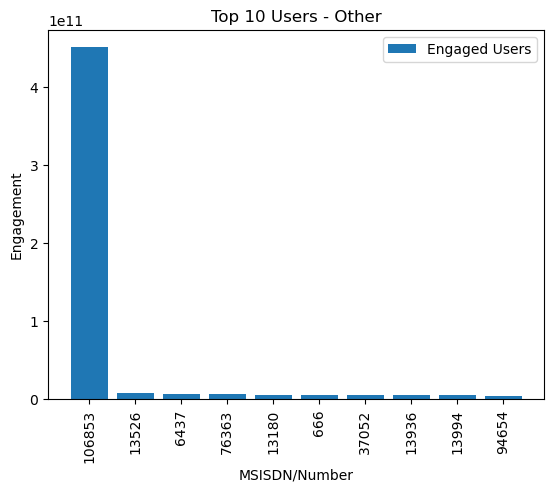

In [59]:
# Plot the top 3 most used applications
top_3_applications = ['Netflix','Youtube','Other']

for app in top_3_applications:
    plt.figure()
    top_10_users = top_10_users_per_app[app]
    x = range(len(top_10_users))
    plt.bar(x, top_10_users, label='Engaged Users')
    plt.xlabel('MSISDN/Number')
    plt.ylabel('Engagement')
    plt.title(f'Top 10 Users - {app}')
    plt.xticks(x, top_10_users.index, rotation='vertical')
    plt.legend()
    plt.show()

In [60]:
# Use the elbow method to determine the optimized value of k for clustering
inertia = []
k_values = range(2, 11)  # Test values of k from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(engagement_metrics_normalized)
    inertia.append(kmeans.inertia_)

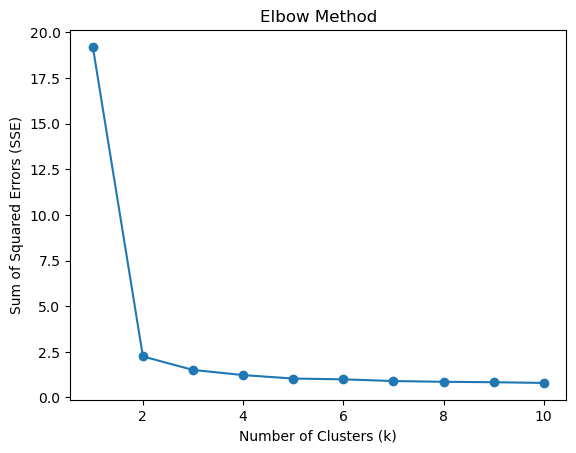

In [61]:
# Plot the SSE for different values of k
plt.plot(list(sse.keys()), list(sse.values()),marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

In [62]:
print(top_10_sessions_frequency)
print(top_10_session_duration)
print(top_10_total_traffic)
print(cluster_metrics)


        MSISDN/Number  session_frequency  Session_Duration  total_traffic  \
106853   4.188282e+10            1136356      7.255100e+07   5.317447e+11   
13526    3.362632e+10                324      8.791927e+06   7.971167e+09   
6437     3.361489e+10                289      9.966898e+06   8.846226e+09   
13180    3.362578e+10                289      1.855375e+07   8.499621e+09   
37052    3.365973e+10                256      4.035428e+06   7.705863e+09   
76363    3.367588e+10                225      4.865947e+06   7.891111e+09   
92923    3.376054e+10                225      9.279434e+06   8.514774e+09   
65118    3.366716e+10                169      8.744914e+06   5.618394e+09   
666      3.360313e+10                144      6.287761e+06   4.976195e+09   
1279     3.360452e+10                144      5.207990e+06   5.487855e+09   

        Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
106853             1.937715e+09             3.610230e+07       6.007942e+

In [63]:
print(top_10_users_per_app)

{'Social Media': 106853    1.973817e+09
13526     4.337478e+07
92923     3.978319e+07
37052     3.541236e+07
6437      2.829454e+07
13180     2.713550e+07
65118     2.424785e+07
106137    2.397492e+07
70960     2.380083e+07
666       2.307782e+07
dtype: float64, 'Google': 106853    8.248577e+09
13526     1.521919e+08
13180     1.423079e+08
6437      1.279738e+08
92923     1.232231e+08
37052     1.165163e+08
106137    1.102545e+08
76363     1.098605e+08
65118     1.050327e+08
94654     9.708999e+07
dtype: float64, 'Email': 106853    2.399880e+09
13526     4.241878e+07
6437      4.078863e+07
13180     4.063397e+07
106137    3.631012e+07
37052     3.599979e+07
92923     3.369377e+07
76363     3.151442e+07
60087     3.041788e+07
65118     3.033580e+07
dtype: float64, 'Youtube': 106853    2.434073e+10
13180     4.529588e+08
92923     3.962892e+08
6437      3.943702e+08
13526     3.744830e+08
76363     3.174106e+08
65118     3.152313e+08
13994     3.087908e+08
92577     3.031691e+08
86455   